In [2]:
import numpy as np
import matplotlib.pyplot as plt

from pytsp.tspga import TSPGA
from pytsp.cities import get_distance_matrix, plot_cities

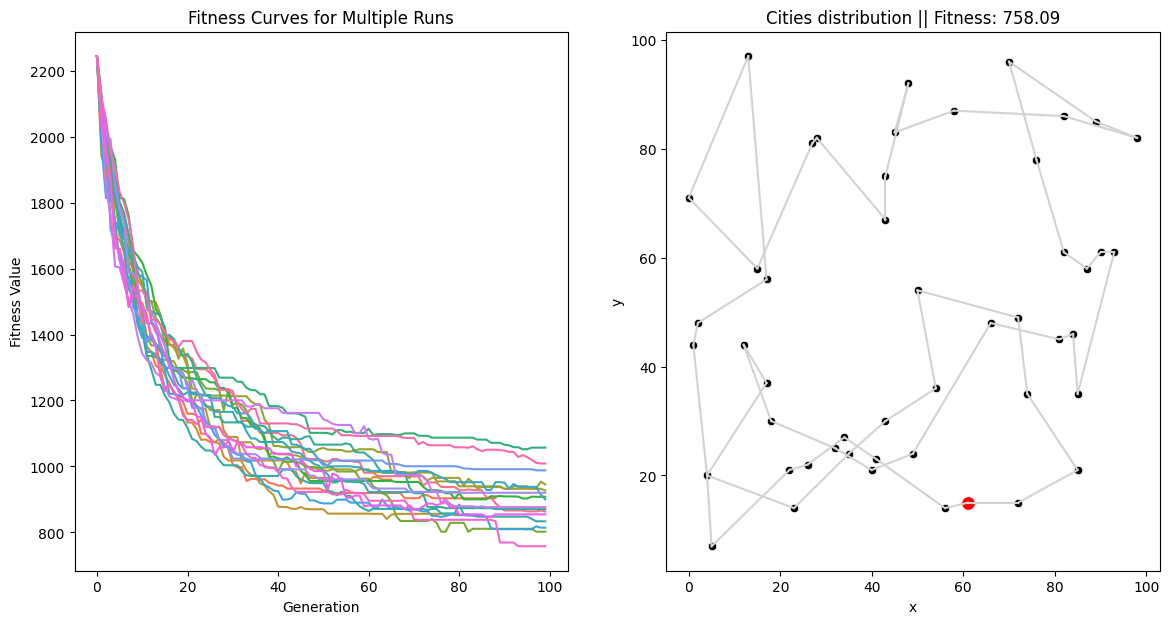

In [3]:
# Parameters setting
cities_path = "../data/cities_example.npy"
population_size = 100
num_generations = 100
tournament_size = 20
crossover_method = "OX"
mutation_rate = 0.1
num_swaps = 4
max_no_convergence = 20
n_starts = 20
n_jobs = 5
save_path = "../data/tspga_run.png"

# Run Genetic Algorithm
cities = np.load(cities_path)
distance_matrix = get_distance_matrix(np.load(cities_path))

genetic = TSPGA(distance_matrix)
best_individual, fitnesses = genetic.run_multi(population_size=population_size,
                                            num_generations=num_generations, 
                                            tournament_size=tournament_size, 
                                            crossover_method=crossover_method, 
                                            mutation_rate=mutation_rate, 
                                            num_swaps=num_swaps, 
                                            max_no_convergence=max_no_convergence,
                                            n_starts=n_starts,
                                            n_jobs=n_jobs)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,7))
genetic.plot_fitness_curves(ax=ax[0])
plot_cities(cities=cities, tour=best_individual.tour, ax=ax[1], fitness=best_individual.fitness)

plt.savefig(save_path)